# Project 1
### Task 1: Self-test for KNN and DT algorithms (3 points)
- Conduct experiments to show the self-test results (using classification report) for
KNN and Decision Tree (DT), respectively.
- Explain how you set parameters for the KNN model. If possible, you are suggested
to use data analysis results to support your explanation and conclusion.
- Explain how you set parameters for the DT model. If possible, you are suggested to
use data analysis results to support your explanation and conclusion.

In [56]:
import pandas as pd

data = pd.read_csv('wifi_localization.txt', header=None, sep="\t")
columns=["label"+str(i) for i in range(0, len(data.columns)-1)]
columns.append('target')
data.columns = columns

data

,label0,label1,label2,label3,label4,label5,label6,target
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


# Data Analysis

<Axes: >

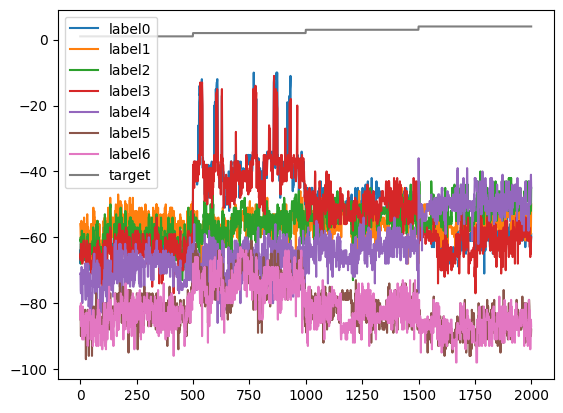

In [57]:
data.plot()

In [58]:
import stats

# mean_values = []
# for item in data.iloc[:, :-1].values:
#     mean_values.append(item.mean())
for i in range(1, 6):
    print("Label ", i," data correlation: ", stats.correlation(xs=data.iloc[:, i-1],ys=data.iloc[:, i]))

KeyboardInterrupt: 

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Define independent (features) and dependent (targets) variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


 
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


print(X_train)

[[-63 -57 -52 ... -52 -88 -93]
 [-37 -58 -55 ... -60 -74 -76]
 [-64 -57 -56 ... -68 -85 -81]
 ...
 [-67 -56 -67 ... -74 -81 -82]
 [-51 -52 -52 ... -68 -79 -87]
 [-59 -60 -60 ... -67 -94 -77]]


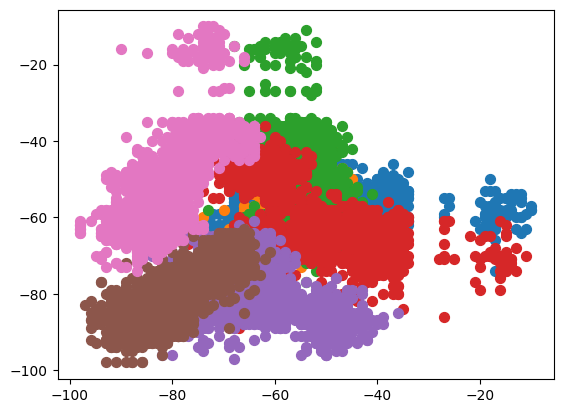

In [68]:
for i in range(0, 7):
    plt.scatter(X[:, i], X[:, i+1 if i < 6 else 0], s=50)

In [69]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import numpy as np
def plot_result(model, X, y):
    means = np.mean(X, axis=1)  # Calculate the mean of each row
    for item, type, mean_value in zip(X, y, means):
        y_pred = model.predict([item])
        #print("Room # ", y_pred, " actual: ", type)
        plt.scatter(y_pred, mean_value)
        #plt.text(y_pred, mean_value, fontsize=9, ha='center')

    plt.xlabel('Class')
    plt.ylabel('Mean of Row')
    plt.title('Class vs. Mean of Row')
    plt.show()


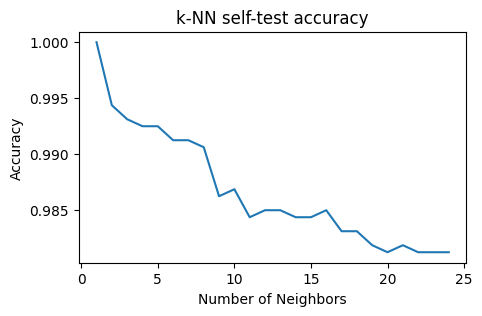

In [70]:
import numpy as np
neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_train, y_train)

plt.figure(figsize=(5, 3))
plt.title('k-NN self-test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

[[403   0   0   0]
 [  0 386   0   0]
 [  0   0 418   0]
 [  0   0   0 393]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       403
           2       1.00      1.00      1.00       386
           3       1.00      1.00      1.00       418
           4       1.00      1.00      1.00       393

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



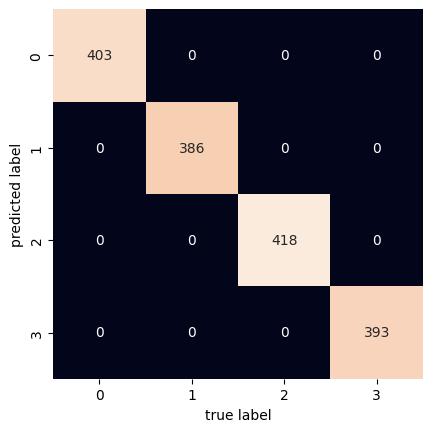

In [71]:
# KNN classification

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)

y_predict = knn.predict(X_train)

conf_mat = confusion_matrix(y_train, y_predict)
print(conf_mat)
print(classification_report(y_train, y_predict))
knn.score(X_train, y_train)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

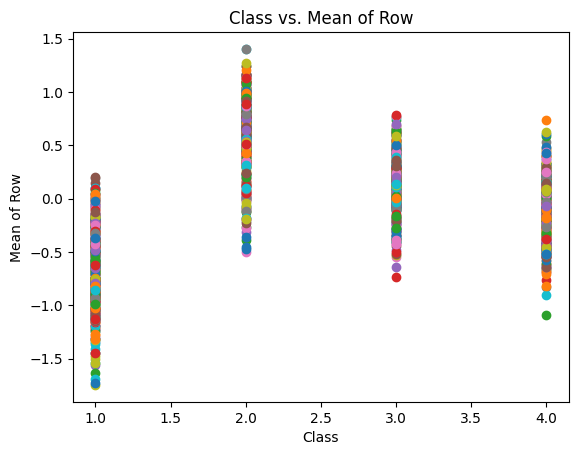

In [64]:
plot_result(knn, X_train, y_train)

[[392   0   0   0]
 [  0 409   0   0]
 [  0   0 392   0]
 [  0   0   0 407]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       392
           2       1.00      1.00      1.00       409
           3       1.00      1.00      1.00       392
           4       1.00      1.00      1.00       407

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



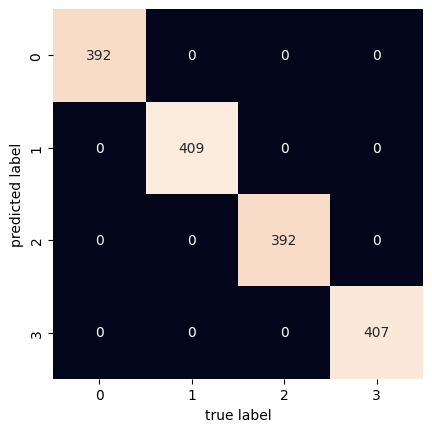

In [65]:
DT = DecisionTreeClassifier()
tree = DT.fit(X_train, y_train)
y_pred = DT.predict(X_train)

conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)
print(classification_report(y_train, y_pred))
DT.score(X_train, y_train)

DT.score(X_train, y_train)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

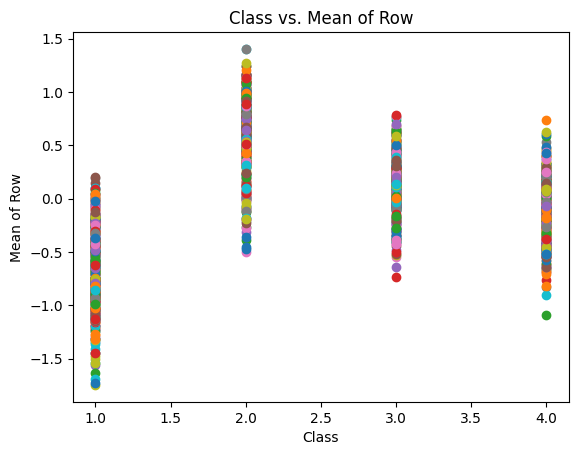

In [66]:
plot_result(DT, X_train, y_train)

### Task 2: Independent-test for KNN and DT algorithms (3 points)
- Assume we use 30% data for independent test, conduct experiments to show the
independent-test results (using classification report) for KNN and DT, respectively.
- Do you use the same KNN model as the self-test above?

a) If yes, please exploit whether you could optimize its parameters to get better
performance. What are the results (using classification report) of the
optimized model?

b) If no, please explain the difference between the self-test model and the
independent-test model and why you make this change.
- Do you use the same DT model as the self-test above?
2

a) If yes, please exploit whether you could optimize its parameters to get better
performance. What are the results (using classification report) of the
optimized model?

b) If no, please explain the difference between the self-test model and the
independent-test model and why you make this change.

In [ ]:
# Define independent (features) and dependent (targets) variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


 
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(X_train)

[[-45 -55 -54 ... -63 -78 -80]
 [-59 -54 -48 ... -47 -85 -89]
 [-47 -51 -56 ... -60 -78 -80]
 ...
 [-39 -57 -50 ... -63 -70 -79]
 [-59 -53 -64 ... -68 -82 -81]
 [-56 -55 -59 ... -74 -84 -79]]


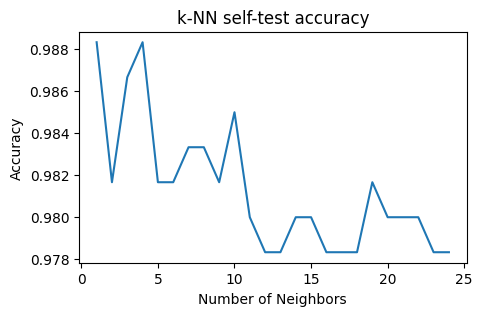

In [ ]:
import numpy as np
neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(5, 3))
plt.title('k-NN self-test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

[[141   0   0   0]
 [  0 161   5   0]
 [  0   2 144   0]
 [  0   0   0 147]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       141
           2       0.99      0.97      0.98       166
           3       0.97      0.99      0.98       146
           4       1.00      1.00      1.00       147

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



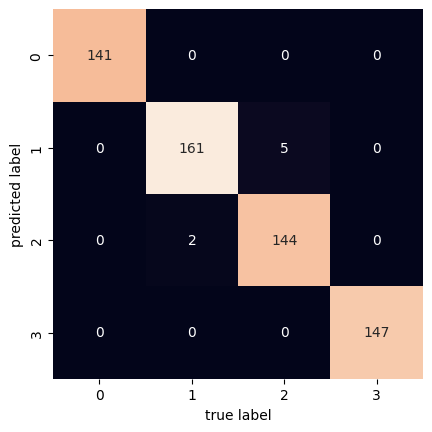

In [ ]:
# KNN classification

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

conf_mat = confusion_matrix(y_test, y_predict)
print(conf_mat)
print(classification_report(y_test, y_predict))
knn.score(X_test, y_test)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

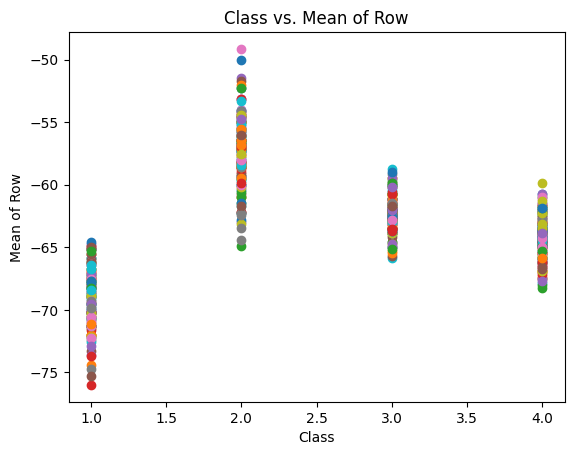

In [ ]:
plot_result(knn, X_test, y_test)

[[104   0   0   0]
 [  0 101   3   0]
 [  1   5  95   3]
 [  2   0   1  85]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       104
           2       0.95      0.97      0.96       104
           3       0.96      0.91      0.94       104
           4       0.97      0.97      0.97        88

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



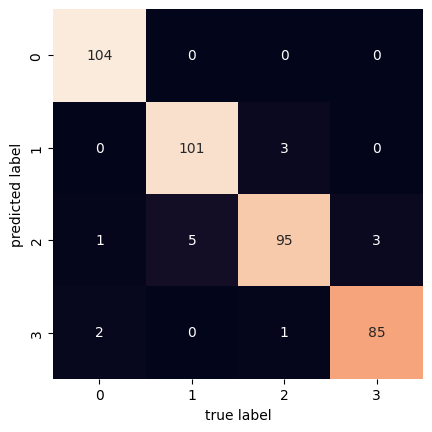

In [128]:
DT = DecisionTreeClassifier(class_weight='balanced', max_features=3)
tree = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))
DT.score(X_test, y_test)

sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

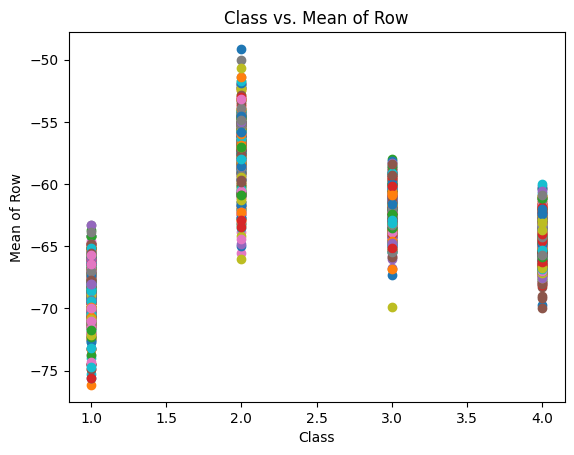

In [112]:
plot_result(DT, X_train, y_train)

### Task 3: Classification model finalization (4 points)
- Based on the above analysis, please further optimize corresponding parameters and
select a model (KNN or DT) for this application scenario that can obtain the highest
performance.
- Please show the independent-test results (using classification report) of the above
model when we use 30% data for test. Draw a figure to show the confusion matrix.
- Conduct independent tests using 10%, 20%, 30%, 40%, and 50% data, respectively,
for test. Draw a line or bar figure to show the corresponding accuracies of these
independent tests.

[[103   0   1   0]
 [  0 103   1   0]
 [  0   0 103   1]
 [  2   0   0  86]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       104
           2       1.00      0.99      1.00       104
           3       0.98      0.99      0.99       104
           4       0.99      0.98      0.98        88

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



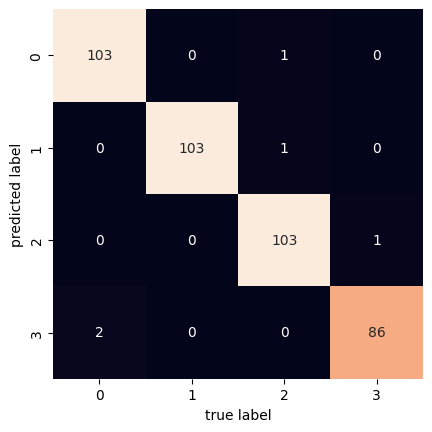

In [127]:
# KNN classification

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

conf_mat = confusion_matrix(y_test, y_predict)
print(conf_mat)
print(classification_report(y_test, y_predict))
knn.score(X_test, y_test)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()